# Representação de dados em Python: a biblioteca Pandas

Código abaixo é baseado na [documentação da biblioteca](https://pandas.pydata.org/pandas-docs/stable/10min.html)

Para tirar bom proveito da biblioteca **Pandas**, é necessário entender dois de seus tipos de dados: **Series** e **DataFrame**

## Series

**Series** é tipo de dados da biblioteca Pandas para representar arranjos de uma dimensão cujos elementos são rotulados. Os rótulos são denominados **index**

In [2]:
import numpy as np
import pandas as pd

Um objeto **Series** pode ser criado a partir de um vetor **numpy**

In [3]:
x = np.random.randn(5)
x

array([ 0.64446976,  1.47749468,  0.68541302, -0.2688636 ,  0.12605989])

In [4]:
s = pd.Series(x)
s

0    0.644470
1    1.477495
2    0.685413
3   -0.268864
4    0.126060
dtype: float64

In [5]:
s = pd.Series(x, index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.644470
b    1.477495
c    0.685413
d   -0.268864
e    0.126060
dtype: float64

Um objeto **Series** também pode ser criado a partir de um dicionário

In [6]:
d = {'b' : 1, 'a' : 0, 'c' : 2}
s = pd.Series(d)
s

b    1
a    0
c    2
dtype: int64

Ou a partir de um valor constante

In [7]:
s = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64


Você pode pensar em um objeto do tipo **Series** como um arranjo

In [8]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.146934
b   -0.113032
c    1.358197
d   -2.622190
e    0.437247
dtype: float64

In [9]:
s[0]


0.14693439245404946

In [10]:
s[:3]

a    0.146934
b   -0.113032
c    1.358197
dtype: float64

In [11]:
s[s > s.median()]

c    1.358197
e    0.437247
dtype: float64

In [12]:
s[[4,3,1]]

e    0.437247
d   -2.622190
b   -0.113032
dtype: float64

In [14]:
np.exp(s)

a    1.158278
b    0.893122
c    3.889175
d    0.072644
e    1.548438
dtype: float64

Você também pode pensar em um objeto do tipo **Series** como um dicionário

In [15]:
s['a']

0.14693439245404946

In [16]:
'e' in s

True

In [17]:
'f' in s

False

Você **raramente** vai precisar manipular os elementos de um objeto **Series**, por exemplo, utlizando um laço **for**. A maior parte das operações são "Vetorizadas"

Veja alguns outros exemplos:

In [18]:
s + s

a    0.293869
b   -0.226064
c    2.716394
d   -5.244380
e    0.874493
dtype: float64

In [19]:
2 * s

a    0.293869
b   -0.226064
c    2.716394
d   -5.244380
e    0.874493
dtype: float64

In [20]:
s.sum()

-0.7928441478017763

In [19]:
s.mean()

-0.23010287048661654

In [20]:
s.min()

-1.0218425144435266

A tarefa de **Ordenação** é fácil!

In [21]:
s.sort_index()

a   -1.021843
b   -0.538024
c    0.146737
d    1.032199
e   -0.769584
dtype: float64

In [22]:
s.sort_index(ascending = False)

e   -0.769584
d    1.032199
c    0.146737
b   -0.538024
a   -1.021843
dtype: float64

In [23]:
s.sort_values()

a   -1.021843
e   -0.769584
b   -0.538024
c    0.146737
d    1.032199
dtype: float64

Uma grande vantagem com relação a arranjos **numpy** é o alinhamento automático durante operações

In [24]:
s

a   -1.021843
b   -0.538024
c    0.146737
d    1.032199
e   -0.769584
dtype: float64

In [25]:
A = s[1:]
A

b   -0.538024
c    0.146737
d    1.032199
e   -0.769584
dtype: float64

In [26]:
B = s[:4]
B

a   -1.021843
b   -0.538024
c    0.146737
d    1.032199
dtype: float64

In [27]:
A + B

a         NaN
b   -1.076047
c    0.293473
d    2.064398
e         NaN
dtype: float64

Podemos dar nome a um objeto **Series**

In [21]:
s = pd.Series(np.random.randn(5), name='Um Nome')
s

0   -0.059018
1    0.629282
2    0.964217
3    1.192674
4   -0.439295
Name: Um Nome, dtype: float64

In [29]:
s.rename('Outro Nome')
s

0    0.531091
1   -0.256848
2    0.804917
3   -1.660343
4   -1.514750
Name: Um Nome, dtype: float64

## DataFrame

**DataFrame** é uma estrutura bi-dimensional com elementos rotulados. Assim como para **Series**, os rótulos das linhas estão em um **index**. Além disso, os rótulos das colunas são chamados de **columns**

Você pode pensar em um objeto **DataFrame** como uma lista de objetos do tipo **Series** (mas na verdade é um pouco mais complicado)

Há várias maneiras de criar um objeto **DataFrame**. Por exemplo, de um dicionário de **Series**

In [22]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [23]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [24]:
df.columns

Index(['one', 'two'], dtype='object')

Pode-se criar um **DataFrame** a partir de um dicionário de listas

In [25]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

In [26]:
df = pd.DataFrame(d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [27]:
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


Ou a partir de uma coleção de **registros**

In [28]:
d = [[1,  2., 'Hello'], [2,  3., 'World'], [3, 4, '!']]
d
df = pd.DataFrame.from_records(d, columns = ['A', 'B', 'C'], index = 'C')
df

,A,B
C,,
Hello,1,2.0
World,2,3.0
!,3,4.0


Ou através de uma matriz

In [37]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,0.314392,-0.546771,1.083902
2000-01-02,0.813573,0.434268,0.742169
2000-01-03,-0.057564,0.918746,0.089522
2000-01-04,1.374046,0.606420,-1.599789
2000-01-05,0.058784,0.502723,0.897593
2000-01-06,-1.513271,0.902802,-1.363325
2000-01-07,0.359667,0.684851,-1.348694
2000-01-08,-1.087744,-1.225487,-0.614447


## Como podemos usar DataFrames?

In [30]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.plot()

In [31]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [32]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Manipulação básica


In [41]:
df.head() # mostra o topo

,A,B,C,D
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-04,-1.866631,1.415298,1.719371,0.469203
2013-01-05,-0.734728,-0.396255,-0.884039,1.381769


In [42]:
df.tail() # mostra o fim

,A,B,C,D
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-04,-1.866631,1.415298,1.719371,0.469203
2013-01-05,-0.734728,-0.396255,-0.884039,1.381769
2013-01-06,-0.860862,0.839730,-0.122922,-1.469449


In [43]:
df.index # retorna o índice

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [44]:
df.columns # retorna as colunas

Index(['A', 'B', 'C', 'D'], dtype='object')

In [45]:
df.values # retorna os valores como uma matriz numpy

array([[ 1.69812865, -0.20577223,  0.08762732,  0.43992861],
       [ 1.00399649, -0.27314571,  1.37958226, -0.09475735],
       [-1.38224233, -0.03666908,  0.28095205, -1.01386457],
       [-1.8666313 ,  1.41529808,  1.71937082,  0.46920287],
       [-0.73472757, -0.39625498, -0.88403911,  1.38176938],
       [-0.86086159,  0.83972951, -0.12292221, -1.46944947]])

In [46]:
df.describe() # medidas descritivas para atributos numéricos

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.357056,0.223864,0.410095,-0.047862
std,1.400181,0.732508,0.973002,1.049325
min,-1.866631,-0.396255,-0.884039,-1.469449
25%,-1.251897,-0.256302,-0.070285,-0.784088
50%,-0.797795,-0.121221,0.184290,0.172586
75%,0.569315,0.620630,1.104925,0.461884
max,1.698129,1.415298,1.719371,1.381769


In [47]:
df2.describe() # veja que atributos não numéricos são ignorados

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [48]:
df.T # DataFrame transposta

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.698129,1.003996,-1.382242,-1.866631,-0.734728,-0.860862
B,-0.205772,-0.273146,-0.036669,1.415298,-0.396255,0.839730
C,0.087627,1.379582,0.280952,1.719371,-0.884039,-0.122922
D,0.439929,-0.094757,-1.013865,0.469203,1.381769,-1.469449


In [49]:
df.sort_index(axis = 0, ascending = False) # ordena linhas pelo índice (decrescente)

,A,B,C,D
2013-01-06,-0.860862,0.839730,-0.122922,-1.469449
2013-01-05,-0.734728,-0.396255,-0.884039,1.381769
2013-01-04,-1.866631,1.415298,1.719371,0.469203
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-01,1.698129,-0.205772,0.087627,0.439929


In [50]:
# ordena colunas em ordem descrescente
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.439929,0.087627,-0.205772,1.698129
2013-01-02,-0.094757,1.379582,-0.273146,1.003996
2013-01-03,-1.013865,0.280952,-0.036669,-1.382242
2013-01-04,0.469203,1.719371,1.415298,-1.866631
2013-01-05,1.381769,-0.884039,-0.396255,-0.734728
2013-01-06,-1.469449,-0.122922,0.839730,-0.860862


In [51]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-05,-0.734728,-0.396255,-0.884039,1.381769
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-06,-0.860862,0.839730,-0.122922,-1.469449
2013-01-04,-1.866631,1.415298,1.719371,0.469203


In [52]:
df.sort_values(by = ['B', 'D'], ascending = [True, False])

,A,B,C,D
2013-01-05,-0.734728,-0.396255,-0.884039,1.381769
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-06,-0.860862,0.839730,-0.122922,-1.469449
2013-01-04,-1.866631,1.415298,1.719371,0.469203


In [53]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Seleção em DataFrames

Como podemos selecionar áreas de interesse de uma DataFrame?

In [54]:
# Series com nome 'A' de 'df'
df['A']

2013-01-01    1.698129
2013-01-02    1.003996
2013-01-03   -1.382242
2013-01-04   -1.866631
2013-01-05   -0.734728
2013-01-06   -0.860862
Freq: D, Name: A, dtype: float64

In [55]:
# Mesmo que df['A']
df.A

2013-01-01    1.698129
2013-01-02    1.003996
2013-01-03   -1.382242
2013-01-04   -1.866631
2013-01-05   -0.734728
2013-01-06   -0.860862
Freq: D, Name: A, dtype: float64

In [56]:
# As 3 primeiras linhas de 'df'
df[0:3]

,A,B,C,D
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865


In [57]:
# Indexando pelo índice
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865
2013-01-04,-1.866631,1.415298,1.719371,0.469203


#### Seleção por rótulo

**loc[]** localiza as linhas (ou colunas) satisfazendo um critério de busca

In [58]:
# retornando as linhas com índice '20130101'
df.loc['20130101']

A    1.698129
B   -0.205772
C    0.087627
D    0.439929
Name: 2013-01-01 00:00:00, dtype: float64

In [59]:
# Seleciona todas as linhas das colunas 'A' e 'B'
df.loc[:,['A','B']]

,A,B
2013-01-01,1.698129,-0.205772
2013-01-02,1.003996,-0.273146
2013-01-03,-1.382242,-0.036669
2013-01-04,-1.866631,1.415298
2013-01-05,-0.734728,-0.396255
2013-01-06,-0.860862,0.839730


In [60]:
# Seleciona as linhas no intervalo de datas '20130102' a '20130104',
# mas apenas para as colunas 'A' e 'B'
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.003996,-0.273146
2013-01-03,-1.382242,-0.036669
2013-01-04,-1.866631,1.415298


Para acesso rápido a um escalar, pode-se usar **.at()**

In [61]:
# Dia '20130101' da coluna 'A'
df.at[dates[0],'A']

1.6981286452298257

#### Seleção por posição

**iloc()** seleciona linhas (ou colunas) dados inteiros especificando suas posições

In [62]:
# linha 3
df.iloc[3]

A   -1.866631
B    1.415298
C    1.719371
D    0.469203
Name: 2013-01-04 00:00:00, dtype: float64

In [63]:
# linhas 3 e 4, colunas 0 e 1
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.866631,1.415298
2013-01-05,-0.734728,-0.396255


In [64]:
# linhas 1 e 2, todas as colunas
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.003996,-0.273146,1.379582,-0.094757
2013-01-03,-1.382242,-0.036669,0.280952,-1.013865


#### Seleção booleana

O operador **[]** permite expressões booleanas

In [65]:
# Todas as linhas e colunas tais que os elementos da Series 'A'
# sejam positivos
df[df.A > 0]

,A,B,C,D
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-02,1.003996,-0.273146,1.379582,-0.094757


In [66]:
# Todos os elementos da DataFrame que são positivos
df[df > 0]

,A,B,C,D
2013-01-01,1.698129,NaN,0.087627,0.439929
2013-01-02,1.003996,NaN,1.379582,NaN
2013-01-03,NaN,NaN,0.280952,NaN
2013-01-04,NaN,1.415298,1.719371,0.469203
2013-01-05,NaN,NaN,NaN,1.381769
2013-01-06,NaN,0.839730,NaN,NaN


### Outras operações interessantes

A função **apply()** aplica operações nas colunas/linhas de uma DataFrame

In [67]:
# soma cumulativa
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.698129,-0.205772,0.087627,0.439929
2013-01-02,2.702125,-0.478918,1.467210,0.345171
2013-01-03,1.319883,-0.515587,1.748162,-0.668693
2013-01-04,-0.546748,0.899711,3.467532,-0.199490
2013-01-05,-1.281476,0.503456,2.583493,1.182279
2013-01-06,-2.142338,1.343186,2.460571,-0.287171


In [68]:
# amplitude de cada coluna
df.apply(lambda x: x.max() - x.min())

A    3.564760
B    1.811553
C    2.603410
D    2.851219
dtype: float64

In [69]:
# para operações por linha, precisamos especificar o paraâmetro axis
# soma os valores de cada linha
df.apply(lambda x: x.sum(), axis = 1)

2013-01-01    2.019912
2013-01-02    2.015676
2013-01-03   -2.151824
2013-01-04    1.737240
2013-01-05   -0.633252
2013-01-06   -1.613504
Freq: D, dtype: float64

#### Concatenação

Concatenando DataFrames com **concat()**

In [70]:
df1 = pd.DataFrame(np.random.randn(10, 4))
df1

,0,1,2,3
0,-0.447539,0.201661,0.912268,0.991595
1,0.294586,0.230835,0.024670,-0.340603
2,-2.038057,1.996026,-0.086524,1.621484
3,1.125829,2.630524,1.641147,-1.130270
4,0.615925,1.138388,0.506666,-0.417330
5,-0.887351,-0.593617,-0.870294,1.028663
6,-1.273522,1.412860,-0.792479,1.052116
7,-0.310440,0.266540,-0.027277,-1.255861
8,0.114197,0.818354,-3.185332,0.784347
9,0.373155,-1.328201,0.128520,-1.240454


In [71]:
df2 = pd.DataFrame(np.random.randn(10, 4))
df2

,0,1,2,3
0,-2.187832,0.249248,-0.038727,-2.504053
1,0.177043,-0.625001,-0.172291,0.018330
2,-0.416058,-0.182924,1.021367,0.347655
3,0.881113,-0.606266,2.506853,-1.140782
4,-0.764980,-0.855764,-0.394933,-0.173109
5,-1.173551,-0.163204,0.707260,1.252252
6,1.070481,0.096612,-0.327520,-0.839722
7,-0.156631,-0.944819,-0.812895,-0.342922
8,-1.806213,-0.010321,0.208670,0.960963
9,0.044339,0.635564,-0.511542,-2.225982


In [72]:
# concatenando df1 e df2 em uma única DataFrame
# Repare no que acontece com os índices
df3 = pd.concat([df1, df2])
df3

,0,1,2,3
0,-0.447539,0.201661,0.912268,0.991595
1,0.294586,0.230835,0.024670,-0.340603
2,-2.038057,1.996026,-0.086524,1.621484
3,1.125829,2.630524,1.641147,-1.130270
4,0.615925,1.138388,0.506666,-0.417330
5,-0.887351,-0.593617,-0.870294,1.028663
6,-1.273522,1.412860,-0.792479,1.052116
7,-0.310440,0.266540,-0.027277,-1.255861
8,0.114197,0.818354,-3.185332,0.784347
9,0.373155,-1.328201,0.128520,-1.240454


In [73]:
# É possível reinicializar os índices 
df3.reset_index()

,index,0,1,2,3
0,0,-0.447539,0.201661,0.912268,0.991595
1,1,0.294586,0.230835,0.024670,-0.340603
2,2,-2.038057,1.996026,-0.086524,1.621484
3,3,1.125829,2.630524,1.641147,-1.130270
4,4,0.615925,1.138388,0.506666,-0.417330
5,5,-0.887351,-0.593617,-0.870294,1.028663
6,6,-1.273522,1.412860,-0.792479,1.052116
7,7,-0.310440,0.266540,-0.027277,-1.255861
8,8,0.114197,0.818354,-3.185332,0.784347
9,9,0.373155,-1.328201,0.128520,-1.240454


#### Junção

Junção de DataFrames usando **merge()**

In [74]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,bar,2


In [76]:
right

,key,rval
0,foo,4
1,bar,5


In [77]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Agrupamento por chave

Agregação de uma DataFrame usando **groupby**

In [78]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.236719,-0.264649
1,bar,one,-0.962637,0.781872
2,foo,two,1.106982,-0.070081
3,bar,three,-0.432674,-0.855676
4,foo,two,-1.089825,-1.826892
5,bar,two,1.542066,-0.343843
6,foo,one,-0.455103,-0.344550
7,foo,three,-1.160284,-0.557368


In [79]:
# calcula algumas funções para linhas referentes a todos os possíveis valores 
# da coluna 'A'
df.groupby('A').sum() # soma

,C,D
A,,
bar,0.146755,-0.417646
foo,-1.361511,-3.063539


In [80]:
df.groupby('A').mean() # média

,C,D
A,,
bar,0.048918,-0.139215
foo,-0.272302,-0.612708


É possível fazer o agrupamento por meio de mais de uma coluna simultaneamente

In [81]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.962637  0.781872
    three -0.432674 -0.855676
    two    1.542066 -0.343843
foo one   -0.218384 -0.609198
    three -1.160284 -0.557368
    two    0.017157 -1.896972

### Visualização de dados em DataFrames

Pandas, em combinação com a biblioteca **matplotlib**, permite visualizar dados de uma maneira intuitiva

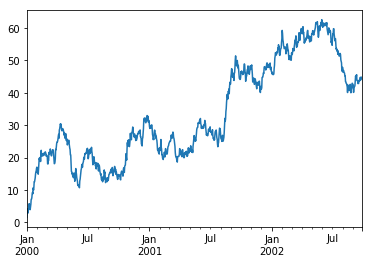

In [38]:
# Visualizando uma série temporal
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts
_ = ts.plot()

In [36]:
# Visualizando várias séries temporais
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-1.185782,0.653080,-0.694269,2.886795
2000-01-02,-0.325024,1.148183,-1.212031,2.460094
2000-01-03,1.074700,0.786722,-1.110371,1.136506
2000-01-04,-0.211852,0.590349,-2.548324,1.357591
2000-01-05,-0.047800,0.866361,-1.453921,3.580462


<Figure size 432x288 with 0 Axes>

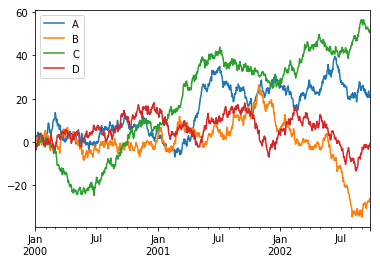

In [84]:
import matplotlib.pyplot as plt
plt.figure()
df.plot()
_ = plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

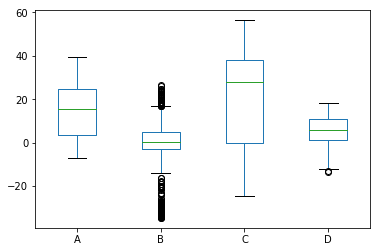

In [85]:
# Box plot de todas as colunas
plt.figure()
_ = df.plot(kind = 'box')

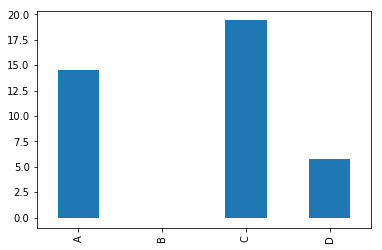

In [86]:
# Vamos fazer um gráfico de barras com a média de cada coluna
_ = df.apply(lambda x: x.mean()).plot(kind = 'bar')